In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1-a

In [2]:
data_a = np.loadtxt('vla_a_array.txt')
data_d = np.loadtxt('vla_d_array.txt')

In [3]:
lat = 34.1 * np.pi / 180
zenith = np.asarray([np.cos(lat),0,np.sin(lat)])
EW = np.asarray([0,1,0])
NS = np.cross(zenith,EW)
mat = np.vstack([NS,EW,zenith])

In [4]:
antpos_a = data_a[:,:3]
antpos_a = antpos_a * 1e-9 * 3e8

xyz_a = antpos_a @ mat.T
EW_a = xyz_a[:,0]
NS_a = xyz_a[:,1]
vertical_rms_a = np.sqrt(np.mean(xyz_a[:,2]**2))

Vertical RMS A array:  19.873410538544693


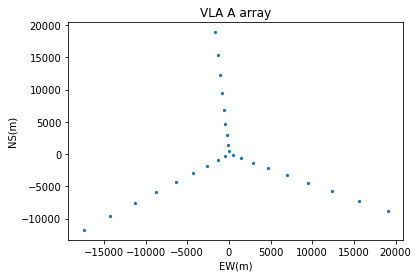

In [5]:
print('Vertical RMS A array: ', vertical_rms_a)
plt.scatter(NS_a, EW_a, s = 5)
plt.title('VLA A array')
plt.xlabel('EW(m)')
plt.ylabel('NS(m)')
plt.show()

In [6]:
antpos_d = data_d[:,:3]
antpos_d = antpos_d * 1e-9 * 3e8

xyz_d = antpos_d @ mat.T
EW_d = xyz_d[:,0]
NS_d = xyz_d[:,1]
vertical_rms_d = np.sqrt(np.mean(xyz_d[:,2]**2))

Vertical RMS A array:  19.873410538544693


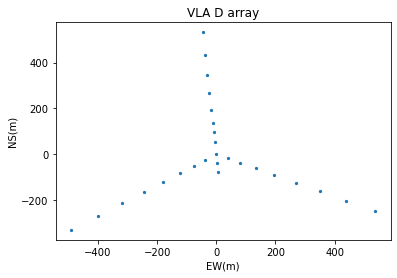

In [7]:
print('Vertical RMS A array: ', vertical_rms_a)
plt.scatter(NS_d, EW_d, s = 5)
plt.title('VLA D array')
plt.xlabel('EW(m)')
plt.ylabel('NS(m)')
plt.show()

# Q1-b

In [8]:
dec = 0
zenith = np.asarray([np.cos(dec),0,np.sin(dec)])
EW = np.asarray([0,1,0])
NS = np.cross(zenith,EW)
proj_mat = np.vstack([EW,NS])

In [9]:
nant_a = antpos_a.shape[0]
nvis_a = nant_a * (nant_a - 1) // 2
uv_a = np.zeros([nvis_a,3])

icur = 0
for i in range(nant_a):
    for j in range(i + 1,nant_a):
        uv_a[icur,:] = antpos_a[i,:] - antpos_a[j,:]
        icur = icur + 1

uv_a = np.vstack([uv_a,-uv_a])
uv_a = uv_a / 3e8 * 1.4e9
uv_snap_a = uv_a @ proj_mat.T

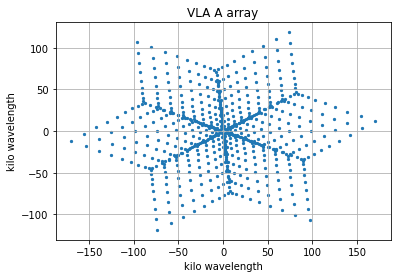

In [10]:
plt.scatter(uv_snap_a[:,0]/1000, uv_snap_a[:,1]/1000, s = 5)
plt.title('VLA A array')
plt.xlabel('kilo wavelength')
plt.ylabel('kilo wavelength')
plt.grid()
plt.show()

In [11]:
nant_d = antpos_d.shape[0]
nvis_d = nant_d * (nant_d - 1) // 2
uv_d = np.zeros([nvis_d,3])

icur = 0
for i in range(nant_d):
    for j in range(i + 1,nant_d):
        uv_d[icur,:] = antpos_d[i,:] - antpos_d[j,:]
        icur = icur + 1

uv_d = np.vstack([uv_d,-uv_d])
uv_d = uv_d / 3e8 * 1.4e9
uv_snap_d = uv_d @ proj_mat.T

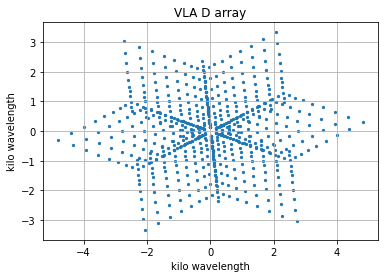

In [12]:
plt.scatter(uv_snap_d[:,0]/1000, uv_snap_d[:,1]/1000, s=5)
plt.title('VLA D array')
plt.xlabel('kilo wavelength')
plt.ylabel('kilo wavelength')
plt.grid()
plt.show()

# Q1-C

In [13]:
#file = ['vla_a_array.txt','vla_d_array.txt']
#config = ['VLA A Array','VLA D Array']

In [14]:
def first_plot(filename):    
    data = np.loadtxt(filename) 
    data = data[:,:3]
    data = data*1e-9*3e8
    N = data.shape[0]
    nvis = N*(N-1)//2
    latitude = 34.1 * np.pi/180 
    zenith = np.asarray([np.cos(latitude),0,np.sin(latitude)])
    east = np.asarray([0,1,0])
    north = np.cross(zenith,east)
    mat = np.vstack([north,east,zenith])
    xyz = data@mat.T
    ns = xyz[:,0]
    ew = xyz[:,1]   
    return data, N, nvis, xyz,ns

In [15]:
def second_plot(filename):
    data, N, nvis, xyz, ns = first_plot(filename)
    uv = np.zeros([nvis,2])
    icur = 0
    for i in range(N):
        for j in range(i+1,N):
            uv[icur,:]=xyz[i,:2]-xyz[j,:2]
            icur=icur+1
    uv = np.vstack([uv,-1*uv])
    uv_3d = np.zeros([nvis,3])
    icur = 0
    for i in range(N):
        for j in range(i+1,N):
            uv_3d[icur,:]=data[i,:]-data[j,:]
            icur=icur+1
    uv_3d=np.vstack([uv_3d,-uv_3d])  
    return uv, uv_3d

In [16]:
def dirty_beam(file,du):
    uv, uv_3d = second_plot(file)
    t = 0
    θ = t*2*np.pi/24
    latitude = 34.1 * np.pi/180
    zenith = np.asarray([np.cos(latitude),0,np.sin(latitude)])
    east = np.asarray([0,1,0])
    north = np.cross(zenith,east)
    mat = np.vstack([east,north])
    pad = 4
    sz = int(np.max(np.abs(uv_3d))/du)
    uv_mat = np.zeros([pad*2*sz,2*pad*sz])
    rot_mat = np.zeros([3,3])
    rot_mat[0,0] = np.cos(θ)
    rot_mat[1,1] = np.cos(θ)
    rot_mat[2,2] = 1.0
    rot_mat[0,1] = np.sin(θ)
    rot_mat[1,0] = -np.sin(θ)
    data = uv_3d@rot_mat
    uv_snap = data@mat.T
    uv_int = np.asarray(uv_snap/du,dtype='int')
    for i in range(uv_snap.shape[0]):
        uv_mat[uv_int[i,0],uv_int[i,1]]=uv_mat[uv_int[i,0],uv_int[i,1]]+1
    beam = np.fft.fftshift(np.abs(np.fft.ifft2(uv_mat)))
    center = beam.shape[0]//2
    beam = beam[center-100:center+100,center-100:center+100]

    plt.figure(figsize=(10,8))
    plt.imshow(beam)
    plt.colorbar()
    plt.show()    
    return beam

VLA A Array Dirty Beam of


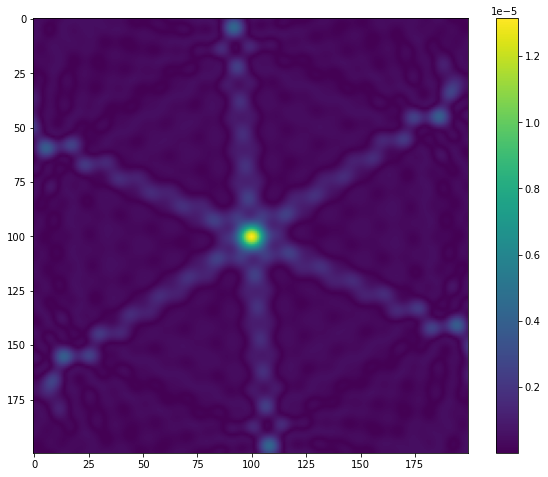

In [17]:
print('VLA A Array Dirty Beam of')
beam_A = dirty_beam('vla_a_array.txt',40.0)

VLA D Array Dirty Beam of


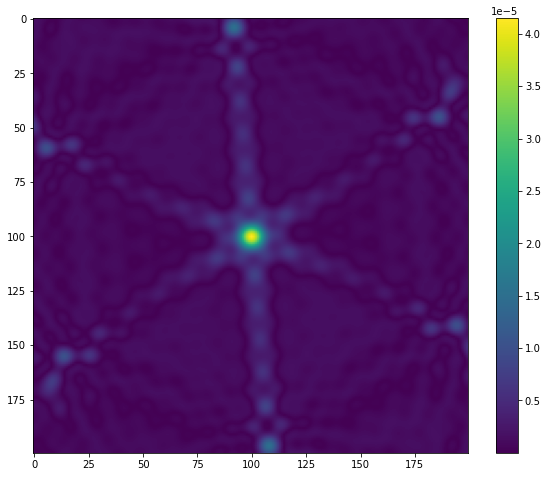

In [18]:
print('VLA D Array Dirty Beam of')
beam_d = dirty_beam('vla_d_array.txt',2.0)

# Q1-d

In [19]:
def uv_movable(file,du,angle):
    uv, uv_3d = second_plot(file)
    t = np.linspace(-4,4,61)
    θ = t*2*np.pi/24
    zenith = np.asarray([np.cos(dec),0,np.sin(dec)])
    east = np.asarray([0,1,0])
    north = np.cross(zenith,east)
    mat=np.vstack([east,north])
    pad = 4
    sz = int(np.max(np.abs(uv_3d))/du)
    uv_mat = np.zeros([pad*2*sz,2*pad*sz])
    for theta in θ :
        rot_mat=np.zeros([3,3])
        rot_mat[0,0]=np.cos(theta)
        rot_mat[1,1]=np.cos(theta)
        rot_mat[2,2]=1.0
        rot_mat[0,1]=np.sin(theta)
        rot_mat[1,0]=-np.sin(theta)
        uv_rot = uv_3d@rot_mat
        uv_snap=uv_rot@mat.T
        plt.scatter(uv_snap[:,0],uv_snap[:,1],color='b',s=1.5)           
        uv_int=np.asarray(uv_snap/du,dtype='int')
        for i in range(uv_snap.shape[0]):
            uv_mat[uv_int[i,0],uv_int[i,1]]=uv_mat[uv_int[i,0],uv_int[i,1]]+1
    beam=np.fft.fftshift(np.abs(np.fft.ifft2(uv_mat)))
    center = beam.shape[0]//2
    beam = beam[center-100:center+100,center-100:center+100]   
    return beam

At Equator


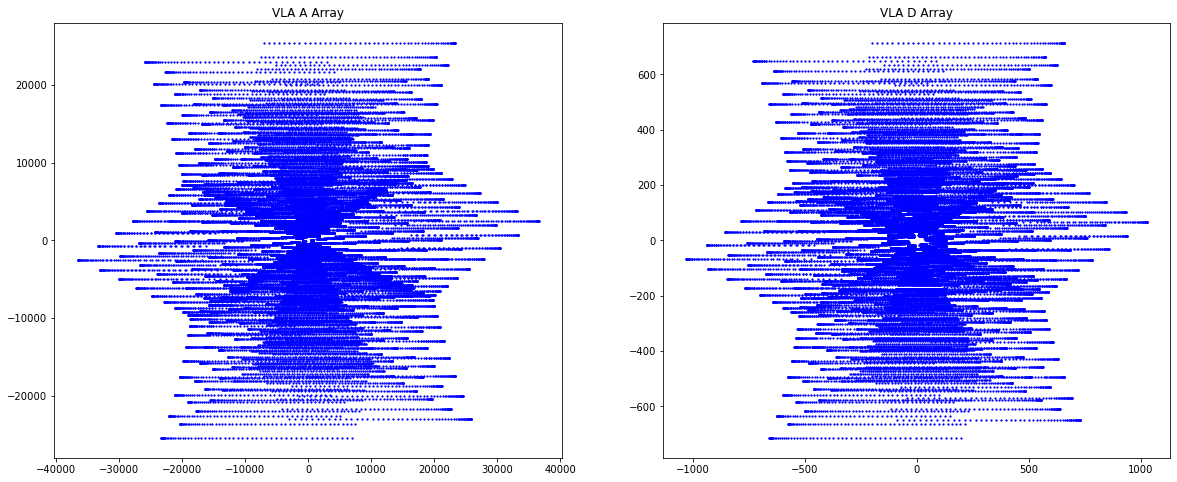

In [20]:
#Equator (θ = 0)
print('At Equator')

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('VLA A Array')
beam_1_e = uv_movable('vla_a_array.txt',40,0)

plt.subplot(1,2,2)
plt.title('VLA D Array')
beam_2_e = uv_movable('vla_d_array.txt',2,0)
plt.show()

At North Celestial Pole


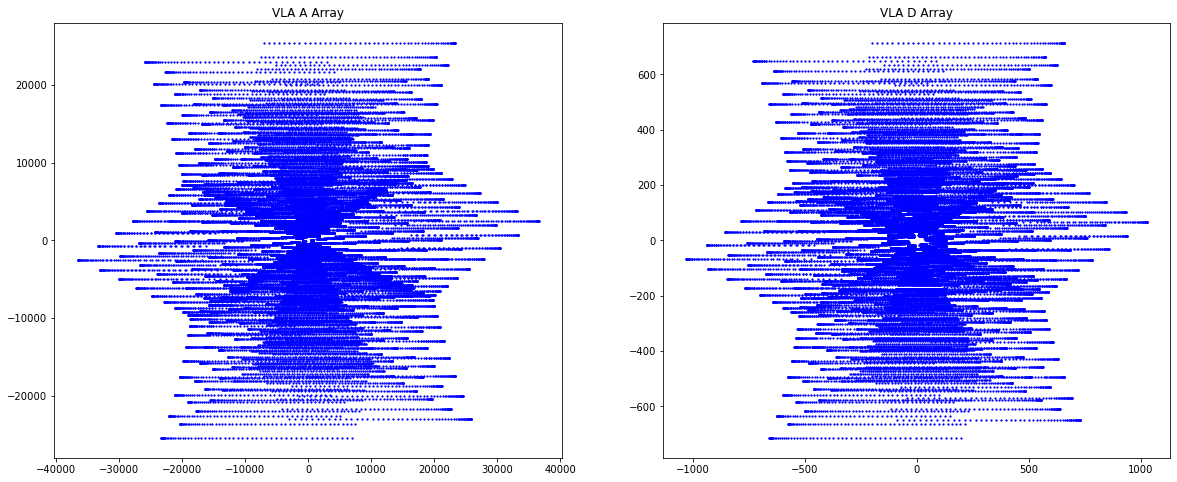

In [21]:
# At North Celestial Pole (θ = 90)

print('At North Celestial Pole')

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('VLA A Array')
beam_1_n = uv_movable('vla_a_array.txt',40,90)

plt.subplot(1,2,2)
plt.title('VLA D Array')
beam_2_n = uv_movable('vla_d_array.txt',2,90)
plt.show()

For a Source Directly Overhead


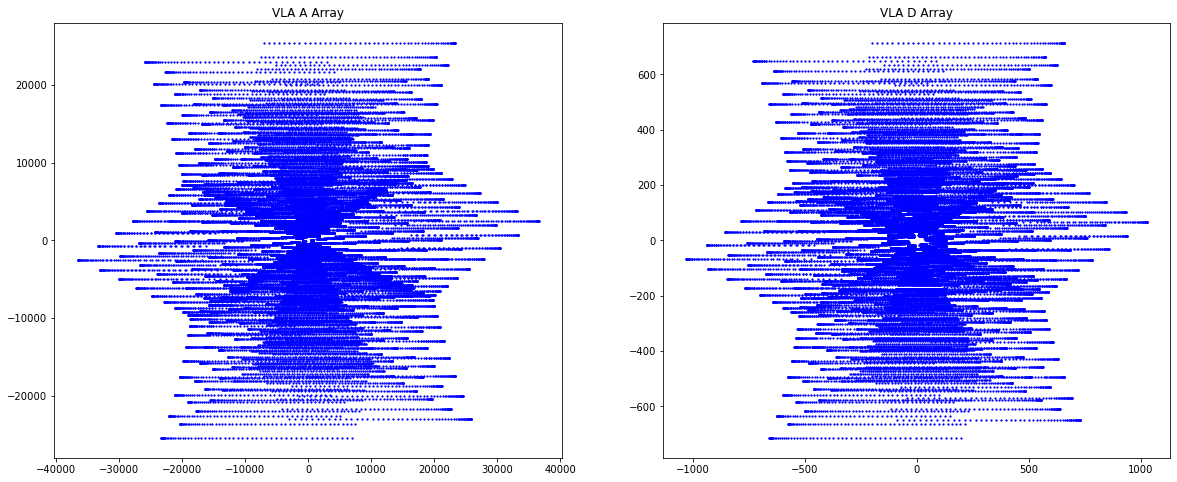

In [22]:
# For a source directly overhead (θ = latitude = 34.1)

print('For a Source Directly Overhead')
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('VLA A Array')
beam_1_o = uv_movable('vla_a_array.txt',40,34.1)

plt.subplot(1,2,2)
plt.title('VLA D Array')
beam_2_o = uv_movable('vla_d_array.txt',2,34.1)
plt.show()


# Q1-e

At Equator


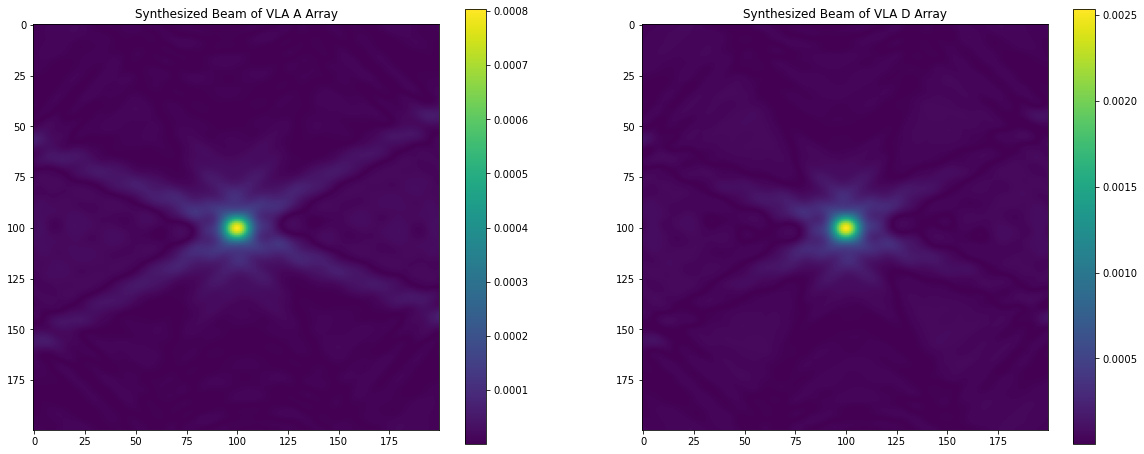

In [23]:
#Equator (θ = 0)
print('At Equator')
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Synthesized Beam of VLA A Array')
plt.imshow(beam_1_e)
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Synthesized Beam of VLA D Array')
plt.imshow(beam_2_e)
plt.colorbar()
plt.show()

At North Celestial Pole


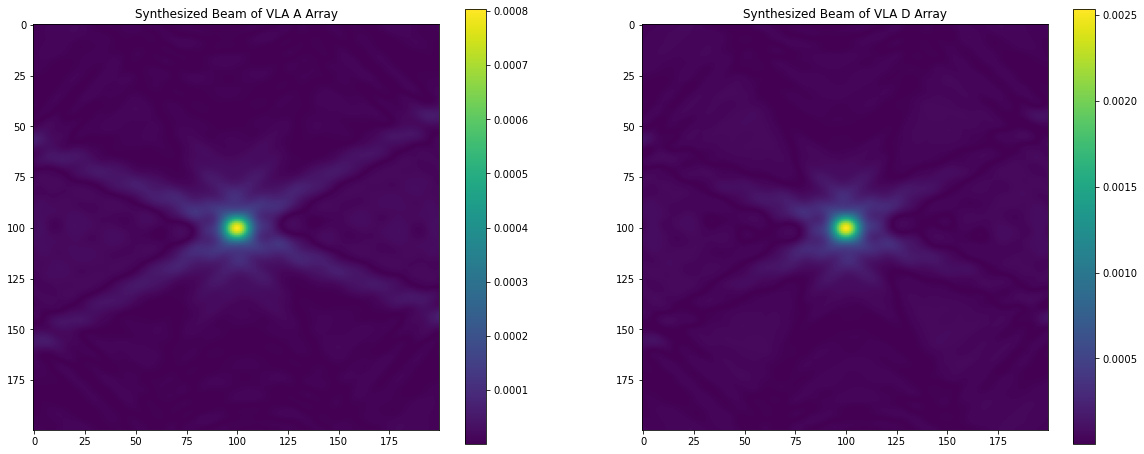

In [24]:
# At North Celestial Pole (θ = 90)
print('At North Celestial Pole')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Synthesized Beam of VLA A Array')
plt.imshow(beam_1_n)
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Synthesized Beam of VLA D Array')
plt.imshow(beam_2_n)
plt.colorbar()
plt.show()

For a Source Directly Overhead


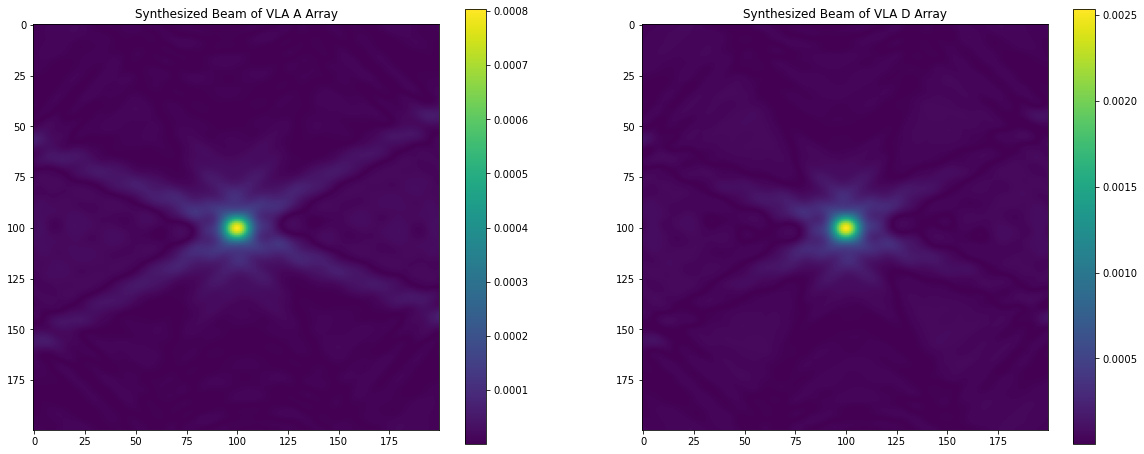

In [25]:
# For a source directly overhead (θ = latitude = 34.1)

print('For a Source Directly Overhead')
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Synthesized Beam of VLA A Array')
plt.imshow(beam_1_o)
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Synthesized Beam of VLA D Array')
plt.imshow(beam_2_o)
plt.colorbar()
plt.show()